# Euronoise paper figure generation

In [2]:
import sys
import os

global_data_path = 'C:/Users/jaulab/Desktop/AAD/Data'
global_path = 'C:/Users/jaulab/Desktop/deepAAD_project'
save_folder_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures')
# global_data_path = 'C:/Users/garce/Desktop/proyecto_2024/Data'
# global_path = 'C:/Users/jaulab/Desktop/proyecto_2024/deepAAD_project'
# global_data_path = 'D:/AAD_EEG/Data'

# Include parent dir
SCRIPT_DIR = os.path.dirname(os.path.abspath('play.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [3]:
import numpy as np
import torch
# Definición funciones para trabajar simpre en float32 con numpy y pytorch
def to_numpy(tensor):
    return tensor.detach().cpu().numpy().astype(np.float32)
def to_tensor(array):
    return torch.tensor(array, dtype=torch.float32)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Icons and images for figures

In [107]:
import numpy as np
from utils.datasets import CustomDataset
from utils.functional import get_data_path, get_filename
import scipy
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [108]:
# Load from the Custom dataset
dataset ='fulsang'
data_path = get_data_path(global_data_path, dataset)
train_set = CustomDataset('fulsang', data_path, 'test', 'S1', window=128, hop=1, cv_fold=None)

In [109]:
att_wav = train_set.stima.T
unatt_wav = train_set.stimb.T
att_wav.shape

torch.Size([19200, 1])

In [133]:
# Load the linear model
project = 'euroacustics'
key = 'subj_specific'
subj = 'S1'
model_name = 'Ridge_scikit_start=-26_end=0_per_trial'
# model_name = 'CCA_enc=80_dec=16_comp=16_max_iter=100'
cv_fold = None

In [134]:
# GET THE MODEL PATH
mdl_load_path = os.path.join(global_path, 'results', project, key, 'models', dataset+'_data', model_name)
if key != 'population':
    mdl_load_path = os.path.join(mdl_load_path, subj)

mdl_filename = get_filename(mdl_load_path, cv_fold)
mdl_load_path = os.path.join(mdl_load_path, mdl_filename)

# LOAD THE MODEL
mdl = pickle.load(open(mdl_load_path, 'rb'))

c:\Users\jaulab\SSS_Enviroment\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [136]:
# For ridge
weights = mdl.best_mdl.coef_.reshape(1, -1)
weights.shape

(1, 1664)

In [124]:
# For CCA
weights_x = mdl.model.x_rotations_
weights_y = mdl.model.y_rotations_
n_comp = mdl.n_components
weights_x.shape, weights_y.shape, n_comp

((1024, 16), (80, 16), 4)

In [126]:
weights_x, weights_y = weights_x[:, :4], weights_y[:, :4]

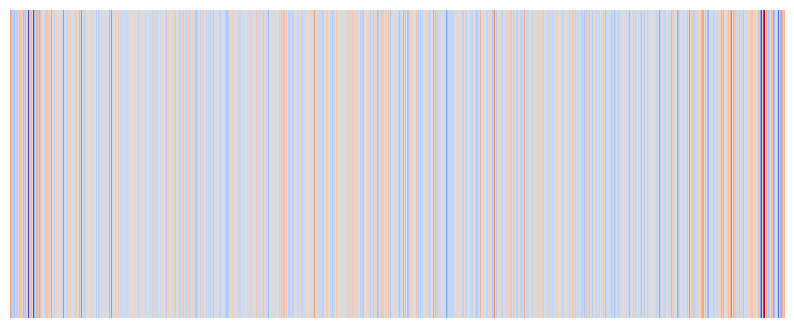

In [137]:
plt.figure(figsize=(10, 4))
ax = sns.heatmap(weights, cmap='coolwarm', cbar=False)
# Eliminar ejes y ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

In [138]:
# APPLY THE MODEL WEIGHTS TO COMPUTE THE PREDICTION
eeg = train_set.eeg.T
preds = mdl.predict(eeg)
preds.shape

(19200, 1)

In [165]:
# First trial
init = 6400
length = 320
trial_range = range(init, init+length) # trial 2
env_att = att_wav[trial_range,0]
env_unatt = unatt_wav[trial_range,0]
pred_win = preds[trial_range,0]
env_att.shape, att_wav.shape, trial_range, len(env_att)

(torch.Size([320]), torch.Size([19200, 1]), range(6400, 6720), 320)

In [157]:
len(env_att)

320

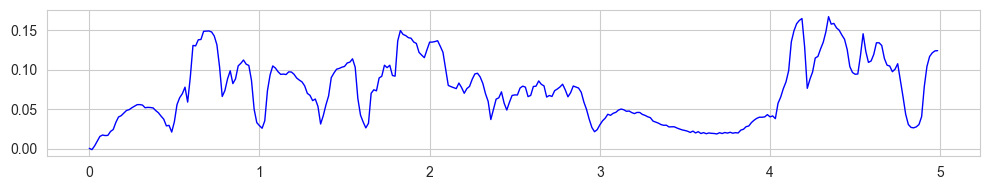

In [166]:
# Representar señales
x = np.arange(0, env_att.shape[0]) / 64

# Primera gráfica
plt.figure(figsize=(10,2))
plt.plot(x, env_att, color='blue', linewidth=1, label='left stim')

# Ajustar espacios entre las gráficas
plt.tight_layout()
plt.show()

In [167]:
def signal_figure(save_path, signal, color):
    # Crear datos de ejemplo
    x = np.arange(0, env_att.shape[0]) / 64

    # Crear la figura
    plt.figure(figsize=(8, 3))
    plt.plot(x, signal, color=color, linewidth=2.5, linestyle='-')

    # Eliminar ejes, ticks y etiquetas
    plt.axis('off')

    # Ajustar márgenes para que la señal no toque los bordes
    plt.margins(x=0, y=0.1)

    # Ajustar layout y GUARDAR antes de mostrar
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)  # Guardar sin fondo

    # Ahora mostrar la figura
    plt.show()

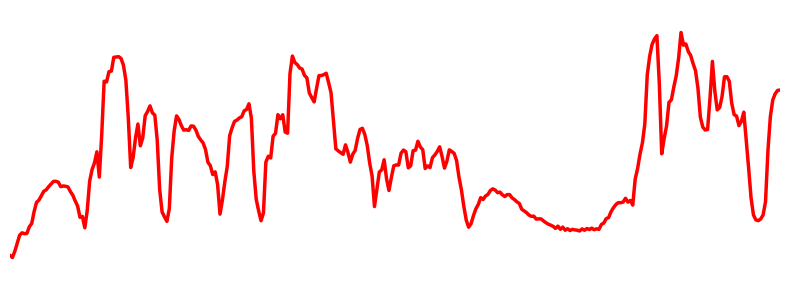

In [ ]:
# Señal atendida
filename = 'Ridge_att_2.png'
signal = env_att
color = 'red'

signal_figure(save_path=save_path, signal=signal, color=color)

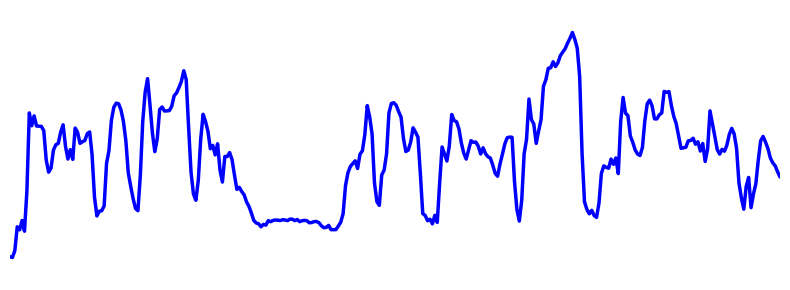

In [169]:
# Señal ignorada
filename = 'Ridge_unatt_2.png'
signal = env_unatt
color = 'blue'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures', filename)

signal_figure(save_path=save_path, signal=signal, color=color)

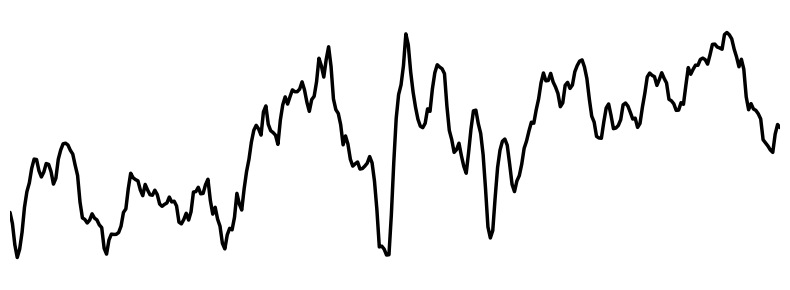

In [170]:
# Predicción
filename = 'Ridge_pred_2.png'
signal = pred_win
color = 'black'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures', filename)

signal_figure(save_path=save_path, signal=signal, color=color)

In [76]:
filename = 'Ridge_preds.png'
save_path = os.path.join(os.path.dirname(global_path), 'AAD', 'euronoise_figures',filename)
plt.savefig(save_path, transparent=True)

<Figure size 640x480 with 0 Axes>

In [385]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
cca_pipeline_path = os.path.join(save_folder_path, 'CCA_pipeline.png')
ridge_dnn_pilieline_path = os.path.join(save_folder_path, 'Ridge_DNN_pipeline.png')

In [388]:
from PIL import Image
import matplotlib.pyplot as plt

# Abrir las imágenes con la mayor calidad
img1 = Image.open(cca_pipeline_path)
img2 = Image.open(ridge_dnn_pilieline_path)

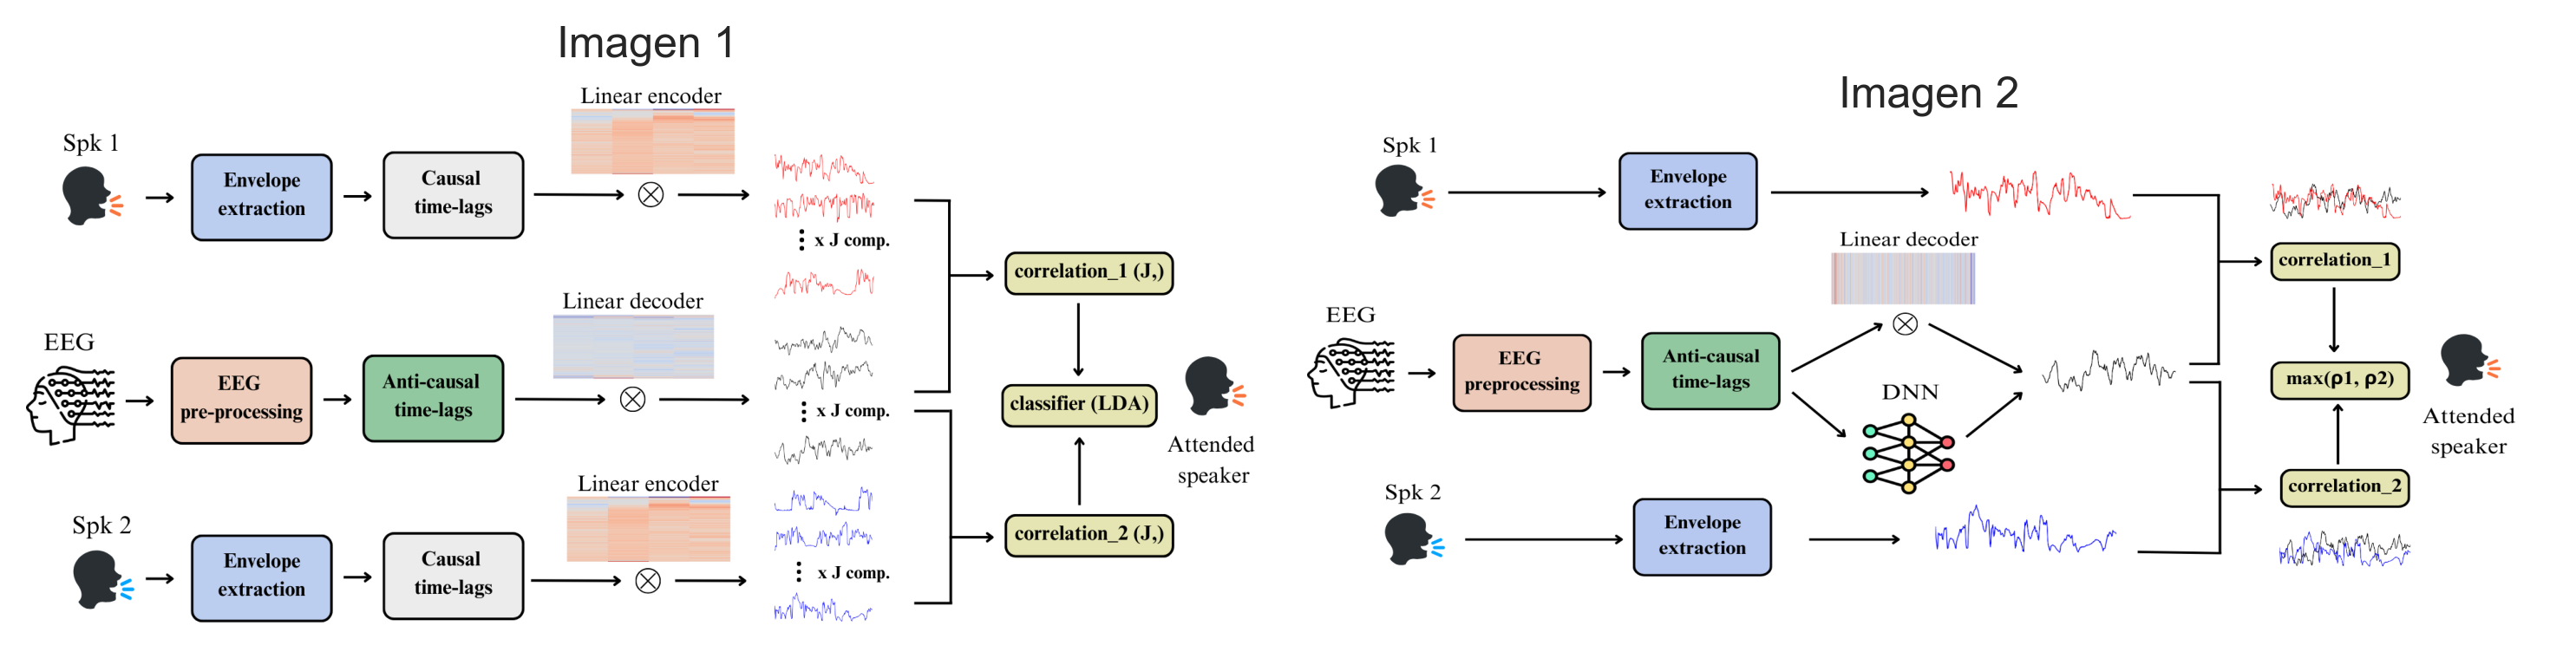

In [396]:
# Obtener las dimensiones de las imágenes
w1, h1 = img1.size
w2, h2 = img2.size

# Definir el alto máximo (el de la imagen más alta)
max_height = max(h1, h2)

# Crear figura y ejes con misma altura
fig, axes = plt.subplots(1, 2, figsize=(10, max_height / 100), dpi=300)

# Mostrar imágenes alineadas verticalmente
axes[0].imshow(img1)
axes[0].set_title("Imagen 1")
axes[0].axis("off")

axes[1].imshow(img2)
axes[1].set_title("Imagen 2")
axes[1].axis("off")

# Ajustar la relación de aspecto para que ambas tengan la misma altura visualmente
axes[0].set_aspect(h1 / max_height)
axes[1].set_aspect(h2 / max_height)

plt.tight_layout()
plt.show()


## Compute metrics for best non-linear models

In [263]:
folder_path = r'C:\Users\jaulab\Desktop\deepAAD_project\results\euroacustics\population\models\fulsang_data'
list_mdl = os.listdir(folder_path)
list_mdl

['CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=broad_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=narrow_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle',
 'Conformer_batch=128_block=50_lr=1e-06_dr=0.4_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.2_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.5_shuffle',
 'Triplet_Net_batch=256_block=320_lr=0.01_triplet_loss_shuffle',
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle',
 'VLAAI_batch=64_block=320_lr=1e-05_shuffle']

In [281]:
model = list_mdl[2]
model

'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle'

In [282]:
mdl_path = os.path.join(folder_path, model)
list_dir = os.listdir(mdl_path)
list_dir

['CNN_cvFold=0_epoch=20_acc=-0.1599.ckpt',
 'CNN_cvFold=1_epoch=31_acc=-0.1584.ckpt',
 'CNN_cvFold=2_epoch=27_acc=-0.1445.ckpt',
 'CNN_cvFold=3_epoch=18_acc=-0.1324.ckpt',
 'CNN_cvFold=4_epoch=23_acc=-0.1565.ckpt']

In [283]:
metrics = [float(filename.split('=')[-1][:-5]) for filename in list_dir]
metrics

[-0.1599, -0.1584, -0.1445, -0.1324, -0.1565]

In [284]:
np.mean(metrics)

-0.15033999999999997

In [272]:
os.path.exists(r'C:/Users/jaulab/Desktop/deepAAD_project\\results\\euroacustics\\population\\models\\fulsang_data\\VLAAI_batch=64_block=320_lr=5e-06_dr=0.4_shuffle')

False

## Histograms for linear models

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [398]:
global_path

'C:/Users/jaulab/Desktop/deepAAD_project'

#### Ridge regression

In [399]:
# Obtain the Ridge model name
model_paths = os.path.join(global_path, 'results', 'euroacustics', 'subj_specific', 'models', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
mdl_name

'Ridge_scikit_start=-26_end=0'

In [400]:
# Check for the paths and add the alphas to a list
alphas = []
model_path = os.path.join(model_paths, mdl_name)
for subj in os.listdir(model_path):
    subj_path = os.path.join(model_path, subj)
    for mdl in os.listdir(subj_path):
        if 'cvFold' in mdl:
            alpha_info = mdl.split('_')[3]
            alpha = alpha_info.split('=')[1]
            alphas.append(float(alpha))

In [401]:
alphas[-10:], len(alphas)

([1000000.0,
  10000.0,
  100000.0,
  10000000.0,
  10000.0,
  10000.0,
  100000.0,
  10000.0,
  1e-07,
  1e-07],
 90)

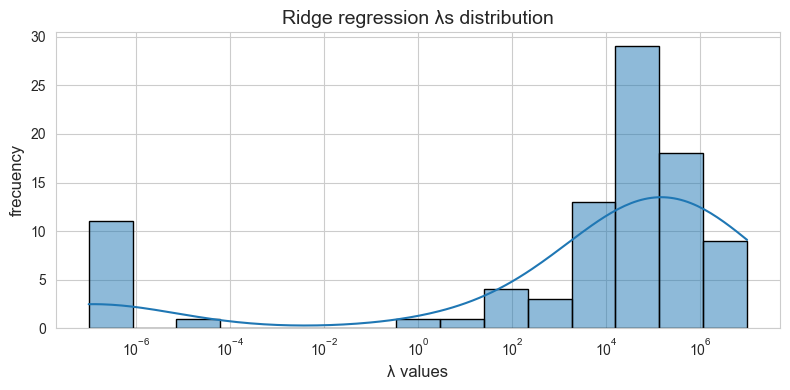

In [402]:
# Generar la gráfica

# Configurar el estilo de la figura
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(8, 4))

# Histograma con escala logarítmica en el eje x
sns.histplot(alphas, bins=15, kde=True, log_scale=True, color='#1f77b4', edgecolor='black')

# Etiquetas y título
plt.xlabel("λ values", fontsize=12)
plt.ylabel("frecuency", fontsize=12)
plt.title("Ridge regression λs distribution", fontsize=14)

# Ajustar diseño y guardar sin fondo para el artículo
plt.tight_layout()
plt.savefig("log_distribution.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

In [403]:
# Comprobación de que el valor del nombre del archivo encaja con el valor del modelo
path = r'C:\Users\jaulab\Desktop\deepAAD_project\results\euroacustics\subj_specific\models\fulsang_data\Ridge_scikit_start=-26_end=0\S1\Ridge_scikit_cvFold=0_alpha=1.00e+05_acc=0.107'

In [404]:
mdl = pickle.load(open(path, 'rb'))

In [405]:
mdl.best_alpha

100000.0

In [406]:
mdl.best_mdl

Ridge(alpha=100000.0)

#### CCA

In [407]:
# Cargar los paths para CCA
model_paths = os.path.join(global_path, 'results', 'euroacustics', 'subj_specific', 'models', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA' in model and 'comp=16' in model:
        mdl_name = model
        break
mdl_name

'CCA_enc=80_dec=16_comp=16_max_iter=100'

In [408]:
# Check for the paths and add the alphas to a list
comp_list = []
model_path = os.path.join(model_paths, mdl_name)
for subj in os.listdir(model_path):
    subj_path = os.path.join(model_path, subj)
    for mdl in os.listdir(subj_path):
        if 'cvFold' in mdl:
            comp_info = mdl.split('_')[-1]
            n_comp = comp_info.split('=')[1]
            comp_list.append(int(n_comp))

In [409]:
comp_list[-10:], len(comp_list)

([6, 7, 3, 2, 4, 4, 1, 3, 5, 3], 90)

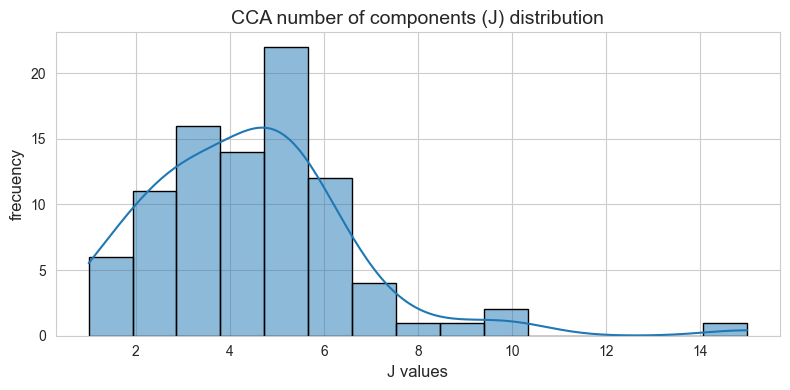

In [410]:
# Generar la gráfica

# Configurar el estilo de la figura
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(8, 4))

# Histograma con escala logarítmica en el eje x
sns.histplot(comp_list, bins=15, kde=True, color='#1f77b4', edgecolor='black')

# Etiquetas y título
plt.xlabel("J values", fontsize=12)
plt.ylabel("frecuency", fontsize=12)
plt.title("CCA number of components (J) distribution", fontsize=14)

# Ajustar diseño y guardar sin fondo para el artículo
plt.tight_layout()
plt.savefig("log_distribution.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

In [431]:
from matplotlib.ticker import ScalarFormatter, MultipleLocator, LogLocator

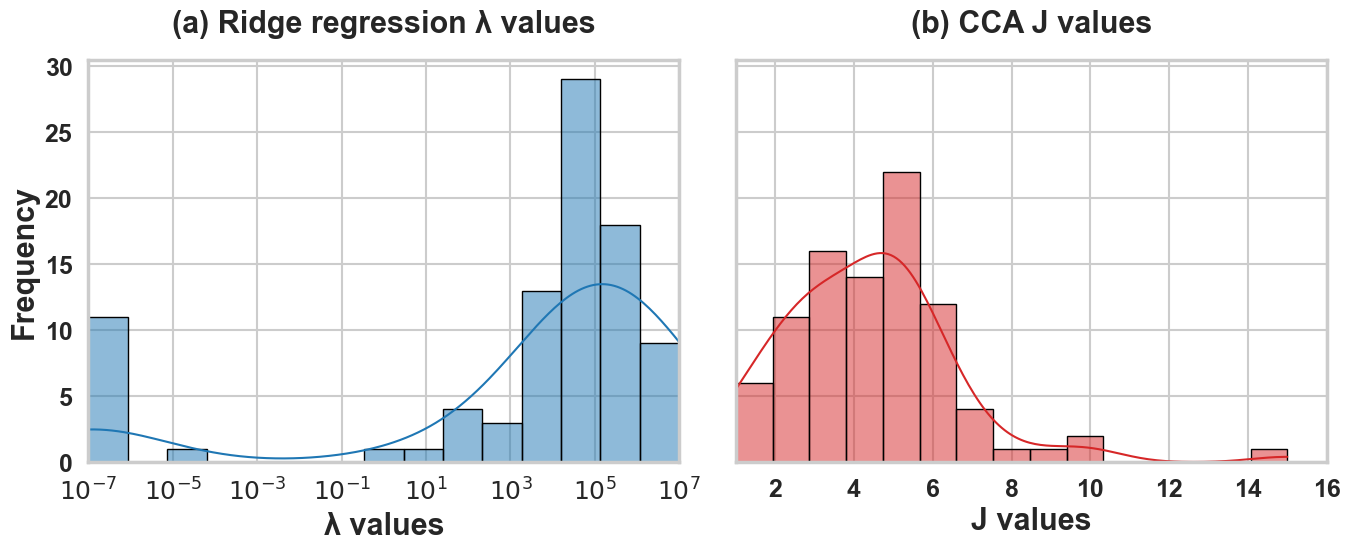

In [435]:
# Configurar el estilo
sns.set_style("whitegrid")
plt.rcParams['font.weight'] = 'bold'  # Poner todo el texto en negrita por defecto

# Crear la figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Lista de colores para diferenciarlas
colors = ['#1f77b4', '#d62728']  # Azul y Rojo

# Datos y títulos
datasets = [alphas, comp_list]
titles = ["Ridge regression λ values", "CCA J values"]
xlabels = ["λ values","J values"]
log = [True, False]

# Generar ambas gráficas
for i, ax in enumerate(axes):
    # Crear el histograma
    sns.histplot(datasets[i], bins=15, kde=True, log_scale=log[i],
        color=colors[i], edgecolor='black', ax=ax)
    
    # Configurar los rangos según las especificaciones
    if i == 0:  # Primera gráfica (logarítmica)
        ax.set_xlim(1e-7, 1e7)  # Rango de 10^-7 a 10^7
        ax.xaxis.set_major_locator(LogLocator(base=10, numticks=8))  # Menos ticks logarítmicos
        # Formato científico para los números
        formatter = plt.FuncFormatter(lambda x, pos: f'$10^{{{int(np.log10(x))}}}$' if x > 0 else '')
        ax.xaxis.set_major_formatter(formatter)
    else:  # Segunda gráfica (lineal)
        ax.set_xlim(1, 16)  # Rango de 1 a 16
        ax.xaxis.set_major_locator(MultipleLocator(2))  # Ticks cada 2 unidades
    
    # Configurar el eje Y para mostrar ticks cada 2 unidades
    ax.yaxis.set_major_locator(MultipleLocator(5))
    
    # Ajustar etiquetas con mayor tamaño y negrita
    ax.set_xlabel(xlabels[i], fontsize=22, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=22, fontweight='bold')
    
    # Ticks significativamente más grandes
    ax.tick_params(axis='both', which='major', labelsize=18, width=3, length=8)
    ax.tick_params(axis='both', which='minor', width=2, length=5)
    
    ax.set_title(f"({chr(97 + i)}) {titles[i]}", fontsize=22, fontweight='bold', pad=20)
    
    # Hacer más gruesas las líneas de los ejes
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
    
    # Ajustar el ancho de las líneas de la cuadrícula (grid)
    ax.grid(linewidth=1.5)

# Ajustar la leyenda (si aparece)
for ax in axes:
    legend = ax.get_legend()
    if legend is not None:
        legend.set_fontsize(18)
        for text in legend.get_texts():
            text.set_fontweight('bold')

# Ajustar diseño y guardar sin fondo
plt.tight_layout(pad=2.5)  # Aumentar el padding para evitar recortes con texto grande
plt.savefig("log_distribution_dual.png", dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

## Subj_specific vs finetuned

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from matplotlib.patches import Patch
import pandas as pd

### Validation loss and accuracy

In [318]:
key = 'population'
metrics_path = f'C:/Users/jaulab/Desktop/deepAAD_project/results/euroacustics/{key}/metrics/fulsang_data'
mdl_list = os.listdir(metrics_path)
mdl_list

['CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=broad_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=narrow_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle',
 'Conformer_batch=128_block=50_lr=1e-06_dr=0.4_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle',
 'Triplet_Net_batch=256_block=320_lr=0.01_triplet_loss_shuffle',
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle']

In [321]:
mdl = mdl_list[2]
mdl_path = os.path.join(metrics_path, mdl, 'val')
metrics_list = os.listdir(mdl_path)
acc_path = os.path.join(mdl_path, metrics_list[0])
loss_path = os.path.join(mdl_path, metrics_list[0])
acc_path

'C:/Users/jaulab/Desktop/deepAAD_project/results/euroacustics/population/metrics/fulsang_data\\CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle\\val\\CNN_cvFold=0_val_decAcc_epoch=20_acc=-0.1599'

In [322]:
# Get validation the accuracies
accuracies = []
for file in metrics_list:
    if 'acc' in file:
        filepath = os.path.join(mdl_path, file)
        acc = json.load(open(filepath, 'rb'))
        print(len(acc))
        accuracies.extend(acc)

20
20
31
31
27
27
18
18
23
23


In [323]:
# Get validation loss (Pearson correlation) and save indices for accuracy
loss_list = []
indices = []
for file in metrics_list:
    if 'loss' in file:
        filepath = os.path.join(mdl_path, file)
        loss = json.load(open(filepath, 'rb'))
        minimo = min(enumerate(loss), key=lambda x: x[1])
        loss_list.append(minimo[1])
        indices.append(minimo[0])
        print(minimo)

(14, -0.15985801815986633)
(25, -0.15836896002292633)
(21, -0.14451178908348083)
(12, -0.13240692019462585)
(17, -0.15651923418045044)


In [324]:
# Get validation accuracy
acc_list = []
for file in metrics_list:
    if 'decAcc' in file:
        filepath = os.path.join(mdl_path, file)
        acc = json.load(open(filepath, 'rb'))
        acc_list.append(acc)

len(acc_list), len(indices)

(5, 5)

In [325]:
best_acc = [acc[idx] for idx, acc in zip(indices, acc_list)]
best_acc, loss_list

([62.307834784219295,
  62.15965919614743,
  60.8816447490276,
  60.01111316910539,
  61.30764956473421],
 [-0.15985801815986633,
  -0.15836896002292633,
  -0.14451178908348083,
  -0.13240692019462585,
  -0.15651923418045044])

In [326]:
# Get the model metrics by introducing the folder path
def get_loss_and_acc(mdl_path, loss_key = 'loss', acc_key = 'decAcc'):

    metrics_list = os.listdir(mdl_path)

    # Classify the paths between loss and accuracy info
    loss_list = []
    acc_list = []
    for file in metrics_list:
        if loss_key in file:
            filepath = os.path.join(mdl_path, file)
            loss = json.load(open(filepath, 'rb'))
            loss_list.append(loss)
        if acc_key in file:
            filepath = os.path.join(mdl_path, file)
            acc = json.load(open(filepath, 'rb'))
            acc_list.append(acc)

    # Get validation loss (Pearson correlation) and save indices for accuracy
    indices = []
    best_loss = []
    for loss in loss_list: 
        minimo = min(enumerate(loss), key=lambda x: x[1])
        best_loss.append(minimo[1])
        indices.append(minimo[0])

    # Select the accuracies corresponding to the indices
    best_acc = [acc[idx] for idx, acc in zip(indices, acc_list)]

    return best_loss, best_acc

In [327]:
key = 'population'
metrics_path = f'C:/Users/jaulab/Desktop/deepAAD_project/results/euroacustics/{key}/metrics/fulsang_data'
mdl_list = os.listdir(metrics_path)
mdl_list

['CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=broad_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=narrow_shuffle',
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle',
 'Conformer_batch=128_block=50_lr=1e-06_dr=0.4_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle',
 'Triplet_Net_batch=256_block=320_lr=0.01_triplet_loss_shuffle',
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle']

In [328]:
mdl = mdl_list[-1]
mdl_path = os.path.join(metrics_path, mdl, 'val')

In [329]:
loss, acc = get_loss_and_acc(mdl_path)
loss, acc

([-0.06335872411727905,
  -0.07404066622257233,
  -0.0649227499961853,
  -0.06912794709205627,
  -0.07125246524810791],
 [56.28068550254748,
  57.174617878647524,
  57.84159333024549,
  56.6373320981936,
  57.4617878647522])

In [330]:
models = [mdl_list[2], mdl_list[4], mdl_list[-1]] # CNN, Conformer, VLAAI
models

['CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle',
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle',
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle']

In [331]:
from scipy.stats import ttest_rel

mdl_data = []
mdl_dicts = []
mdl_pValues = []

for mdl in models:

    loss_dict = {'population': [], 'subj_specific': [], 'finetuned': []}
    acc_dict = {'population': [], 'subj_specific': [], 'finetuned': []}

    # Ensure that the model was selected preciously
    for key in loss_dict.keys():
        mdl_path = f'C:/Users/jaulab/Desktop/deepAAD_project/results/euroacustics/{key}/metrics/fulsang_data/{mdl}'

        if key == 'population':
            mdl_path = os.path.join(mdl_path, 'val')
            loss_list, acc_list = get_loss_and_acc(mdl_path)

        # If not population select from each subject
        elif key == 'subj_specific':
            subjects = os.listdir(mdl_path)
            loss_list, acc_list = [], []
            for s in subjects:
                subj_path = os.path.join(mdl_path, s, 'val')
                if 'CNN' not in mdl:
                    loss, acc = get_loss_and_acc(subj_path, loss_key='val_loss', acc_key='val_acc')
                else:
                    loss, acc = get_loss_and_acc(subj_path)
                loss_list.extend(loss)
                acc_list.extend(acc)

        elif key == 'finetuned':
            mdl_path = f'C:/Users/jaulab/Desktop/deepAAD_project/results/euroacustics/population/finetune_metrics/fulsang_data/{mdl}'
            subjects = os.listdir(mdl_path)
            loss_list, acc_list = [], []
            for s in subjects:
                subj_path = os.path.join(mdl_path, s, 'val')
                if 'CNN' not in mdl:
                    loss, acc = get_loss_and_acc(subj_path, loss_key='val_loss', acc_key='val_acc')
                else:
                    loss, acc = get_loss_and_acc(subj_path)
                loss_list.extend(loss)
                acc_list.extend(acc)

        loss_dict[key] = loss_list
        acc_dict[key] = acc_list

    # Compute the paired t-test between the subj_specific and the finetuned distributions
    t_stat, p_stat = ttest_rel(acc_dict['subj_specific'][:90], acc_dict['finetuned'][:90])
    
    # Accuracy data for constructing de Dataframe
    data = [(method, value) for method, values in acc_dict.items() for value in values]
    mdl_data.append(data)
    mdl_dicts.append((loss_dict, acc_dict))
    mdl_pValues.append(p_stat)

mdl_pValues

[0.16079073188835907, 0.7249010045618309, 1.599960682215739e-08]

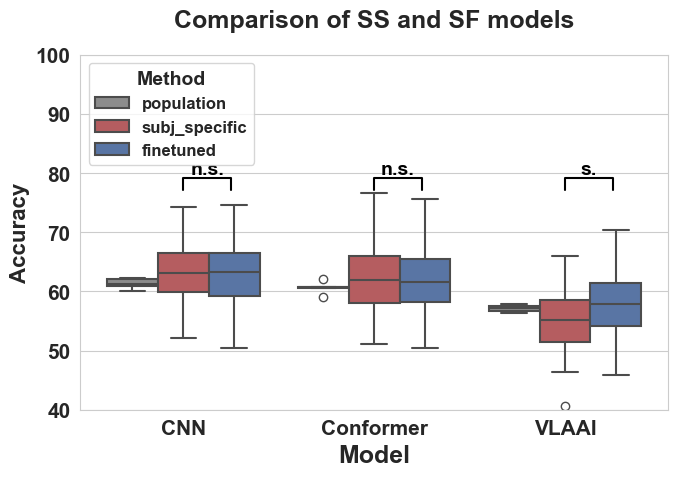

In [336]:
# Crear DataFrame combinando los tres conjuntos de datos
df_list = []
group_labels = ["CNN", "Conformer", "VLAAI"]

for i, data in enumerate(mdl_data):
    df_temp = pd.DataFrame(data, columns=['Method', 'Accuracy'])
    df_temp["Group"] = group_labels[i]  # Añadir identificador de grupo
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# Asignar el número de asteriscos según la significancia estadística
def get_significance(p):
    if p > 0.01:
        return "n.s."  # No significativo
    elif p > 0.001:
        return "*"
    elif p > 0.0001:
        return "**"
    else:
        return "s."

significance_labels = [get_significance(p) for p in mdl_pValues]

# Configurar estilo
sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

# Paleta de colores por método
palette = {"population": "#8c8c8c", "subj_specific": "#c44e52", "finetuned": "#4c72b0"}  # Azul, Rojo, Gris

# Crear el boxplot con colores asociados al método
ax = sns.boxplot(x="Group", y="Accuracy", hue="Method", data=df, palette=palette, width=0.8, linewidth=1.5)

# Ajustar etiquetas y título
ax.set_xlabel("Model", fontsize=18, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=16, fontweight='bold')
ax.set_title("Comparison of SS and SF models", fontsize=18, fontweight='bold', pad=20)

# Limitar el rango en y
ax.set_ylim([40, 100])

# Aumentar tamaño de ticks
ax.tick_params(axis='both', which='major', labelsize=15)

# Posiciones de las comparaciones y anotaciones de p-value
num_groups = len(group_labels)
group_positions = np.arange(num_groups)
y_max = df["Accuracy"].max() + 0.5
h = 2  # Altura de las líneas

for i, (x, p_val) in enumerate(zip(group_positions, mdl_pValues)):
    sig_label = significance_labels[i]
    
    # Dibujar línea horizontal de comparación dentro de cada grupo (comparando la segunda y la tercera caja)
    ax.plot([x, x, x + 0.25, x + 0.25], [y_max, y_max + h, y_max + h, y_max], lw=1.5, c="black")
    ax.text(x + 0.125, y_max + h, sig_label, ha='center', va='bottom', fontsize=14, fontweight='bold', color="black")

# Ajustar leyenda y diseño
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc='upper left')
plt.tight_layout()

# Guardar la figura
plt.savefig(os.path.join(save_folder_path,"SS_vs_SF.png"), dpi=300, bbox_inches='tight', transparent=True)

# Mostrar la figura
plt.show()

#### Análisis estadístico

In [245]:
# Comprobación normalidad
from scipy.stats import shapiro, normaltest

In [295]:
loss_dict, acc_dict = mdl_dicts[1]

In [296]:
loss_ss = loss_dict['subj_specific']
loss_sf = loss_dict['finetuned']

acc_ss = acc_dict['subj_specific']
acc_sf = acc_dict['finetuned']

len(loss_dict['subj_specific'])

90

In [ ]:
# Shaphiro-Wilk test (menos de 50 muestras)
stat1, p1 = shapiro(loss_ss)
stat2, p2 = shapiro(loss_sf)
print(f'Shapiro loss ss: p = {p1}')
print(f'Shapiro loss sf: p = {p2}')

stat1, p1 = shapiro(loss_ss)
stat2, p2 = shapiro(loss_sf)
print(f'Shapiro acc ss: p = {p1}')
print(f'Shapiro acc sf: p = {p2}')

Shapiro loss ss: p = 0.9460151195526123
Shapiro loss sf: p = 0.7807785868644714
Shapiro acc ss: p = 0.9460151195526123
Shapiro acc sf: p = 0.7807785868644714


In [ ]:
# D'agostino-Pearson test (mas de 50 muestras)
stat1, p1 = normaltest(loss_ss)
stat2, p2 = normaltest(loss_sf)
print(f'Agostino-Pearson loss ss: p = {p1}')
print(f'Agostino-Pearson loss sf: p = {p2}')

stat1, p1 = normaltest(loss_ss)
stat2, p2 = normaltest(loss_sf)
print(f'Agostino-Pearson acc ss: p = {p1}')
print(f'Agostino-Pearson acc sf: p = {p2}')

Agostino-Pearson loss ss: p = 0.9923725797557469
Agostino-Pearson loss sf: p = 0.7078630647895277
Agostino-Pearson acc ss: p = 0.9923725797557469
Agostino-Pearson acc sf: p = 0.7078630647895277


Como p > 0.05, en concreto muy superior, podemos asumir normalidad en la distribución de los datos y applicar un parametric test con alguna corrección que ayude a reducir la probabilidad de falsos positivos. La correción de Bonferroni mitiga este problema dividiendo el p resultante por el número de modelos que se comparan a la vez. En este caso comparamos a la vez 5 modelos resultantes de los 5 folds distintos.

In [299]:
from scipy.stats import ttest_rel

In [300]:
# Realizamos el parametric paired t-test entre los modelos ss y sf
t_stat, p_value =  ttest_rel(acc_sf, acc_ss)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
corrected_alpha = alpha / 5
print(f'El nivel de significancia pasa de {alpha} a {corrected_alpha} por la corrección de Bonferroni')

ValueError: unequal length arrays

### Decoding accuracy

In [24]:
# Cargar los paths para CNN
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
mdl_name

'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle'

In [25]:
# Check an example
path = r'C:\Users\jaulab\Desktop\deepAAD_project\results\euroacustics\population\decode_accuracy\fulsang_data\CNN_batch=128_block=50_lr=2e-05_dr=0.2_post_stim=broad_shuffle\global_validation\mesd'
# with open(path, 'r') as archivo:
#     print(archivo)
acc = json.load(open(path, 'rb'))
acc

{'mesd': [72.07349765816771,
  27.092932970358227,
  40.7057466167029,
  23.85722195943219,
  25.436930196257816,
  68.25443349075941,
  5.4667954182922065,
  17.238384025908392,
  49.32056560206084,
  46.5778194903409,
  21.12206423795863,
  25.86136252842636,
  23.561518630517195,
  8.598496378043102,
  8.42311393232031,
  30.171882578454547,
  32.56539513094949,
  57.176845815165834],
 'N_mesd': [21, 7, 5, 5, 10, 7, 5, 10, 13, 5, 10, 5, 7, 7, 7, 7, 10, 13],
 'tau_mesd': [1.0,
  3.011011011011011,
  7.817817817817818,
  4.58058058058058,
  1.4414414414414414,
  7.5825825825825826,
  1.049049049049049,
  1.0,
  1.6866866866866865,
  8.945945945945946,
  1.1961961961961962,
  4.963963963963964,
  2.618618618618618,
  1.0,
  1.0,
  3.354354354354354,
  1.840840840840841,
  1.980980980980981],
 'p_mesd': [0.55,
  0.6224669113558002,
  0.6824157490824158,
  0.6822911800689578,
  0.5947147147147147,
  0.6223473473473472,
  0.6820620620620619,
  0.6,
  0.5766232899566234,
  0.68243243243243

In [26]:
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            accuracies[idx].extend(acc)
accuracies['1s'][:10]

[59.0,
 56.833333333333336,
 55.50000000000001,
 58.5,
 56.666666666666664,
 54.333333333333336,
 64.66666666666666,
 63.0,
 53.666666666666664,
 55.166666666666664]

In [27]:
# Change the dictionary keys to represent the performance curve
accuracies = {int(key[:-1]): value for key, value in accuracies.items()}

In [28]:
accuracies.keys()

dict_keys([1, 2, 5, 10, 25, 50])

In [29]:
# Extraer claves y valores para la representación de la curva de rendimiento
x_values = np.array(list(accuracies.keys()))  # Ventanas temporales
means = np.array([np.mean(v) for v in accuracies.values()])  # Medias
stds = np.array([np.std(v) for v in accuracies.values()])  # Desviaciones estándar

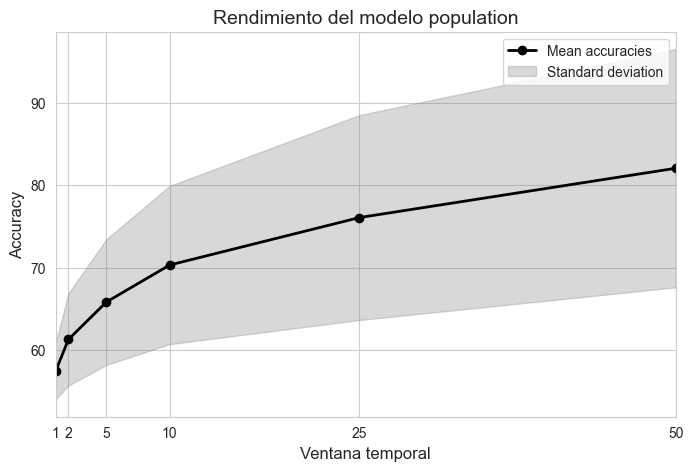

In [30]:
# Seleccionar el estilo
sns.set_style('whitegrid')

# Crear una figura
plt.figure(figsize=(8,5))

# Graficar la media con una línea sólida
plt.plot(x_values, means, marker='o', linestyle='-', color='black', linewidth=2, label='Mean accuracies')

# Agregar el área sombreada de la desviación estándar
plt.fill_between(x_values, means - stds, means + stds, color='gray', alpha=0.3, label='Standard deviation')

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Ventana temporal", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])

# Título y leyenda
plt.title("Rendimiento del modelo population", fontsize=14)
plt.legend()

# Mostrar la gráfica
plt.show()

In [31]:
# Cargar datos para modelos subj-specific (SS)
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ss_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            ss_accuracies[idx].extend(acc)
ss_accuracies['10s'][:10]

[60.0,
 78.33333333333333,
 80.0,
 80.0,
 78.33333333333333,
 60.0,
 88.33333333333333,
 83.33333333333334,
 81.66666666666667,
 75.0]

In [32]:
# Cargar datos para modelos subj-finetuned (SF)
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_finetuned_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
sf_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the path
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            sf_accuracies[idx].extend(acc)
sf_accuracies['10s'][:10]

[75.0,
 78.33333333333333,
 70.0,
 70.0,
 70.0,
 56.666666666666664,
 96.66666666666667,
 83.33333333333334,
 68.33333333333333,
 70.0]

In [33]:
# Change the dictionary keys to represent the performance curve
ss_accuracies = {int(key[:-1]): value for key, value in ss_accuracies.items()}
sf_accuracies = {int(key[:-1]): value for key, value in sf_accuracies.items()}

In [34]:
# Diccionarios en un conjunto
datasets = {
    "Population": accuracies,
    "Subject-specific": ss_accuracies,
    "Subject-finetuned": sf_accuracies
}

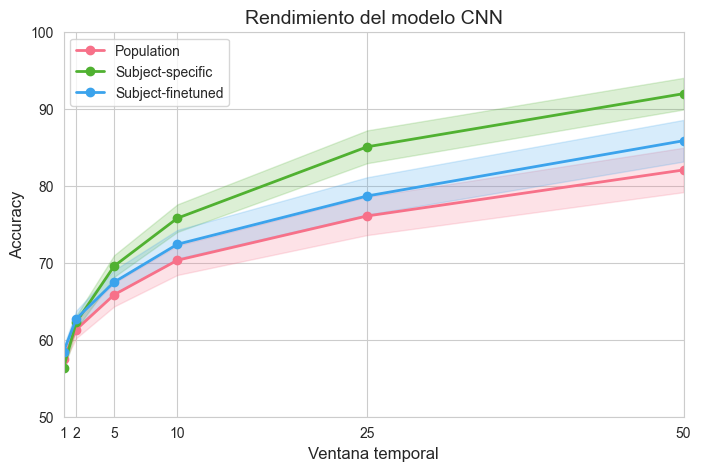

In [35]:
# Estilo de la figura
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(datasets))  # Colores científicos

# Crear la figura
plt.figure(figsize=(8, 5))

# Iterar sobre los datasets y graficarlos
for (label, data), color in zip(datasets.items(), palette):
    x_values = np.array(list(data.keys()))
    means = np.array([np.mean(v) for v in data.values()])
    stds = np.array([np.std(v) for v in data.values()]) * 0.2

    # Graficar la media con una línea sólida
    plt.plot(x_values, means, marker='o', linestyle='-', color=color, linewidth=2, label=label)

    # Agregar el área sombreada de la desviación estándar
    plt.fill_between(x_values, means - stds, means + stds, color=color, alpha=0.2)

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Ventana temporal", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])
plt.ylim([50, 100])

# Título y leyenda
plt.title("Rendimiento del modelo CNN", fontsize=14)
plt.legend()

### MESD

In [118]:
# Cargar el MESD de los modelos population
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            mesd_list.extend(mesd)
mesd_list[:10], len(mesd_list)

([15.19770067135897,
  17.835260790467174,
  55.80621064909904,
  27.90597195636754,
  28.679624544151448,
  95.08155066022229,
  6.960975447946465,
  8.7814564365203,
  24.041059628301017,
  43.84952030079749],
 90)

In [119]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ss_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            ss_mesd_list.extend(mesd)
ss_mesd_list[:10], len(mesd_list)

([81.87306693075924,
  11.074956227249194,
  15.88827146253139,
  24.801236626374155,
  18.224620422742838,
  94.90549075308292,
  12.072612427264703,
  12.592655899860986,
  27.96838408328573,
  15.532780490591325],
 90)

In [120]:
# Cargar el MESD de los modelos population
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_finetuned_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'broad' not in model and 'narrow' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
sf_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            sf_mesd_list.extend(mesd)
sf_mesd_list[:10], len(sf_mesd_list)

([17.113336314372297,
  16.497745342620195,
  32.345916839668895,
  19.41281549490666,
  17.32539265296709,
  64.22584395330078,
  7.698893588817986,
  8.254840677397713,
  36.74276394154745,
  40.71372090036732],
 90)

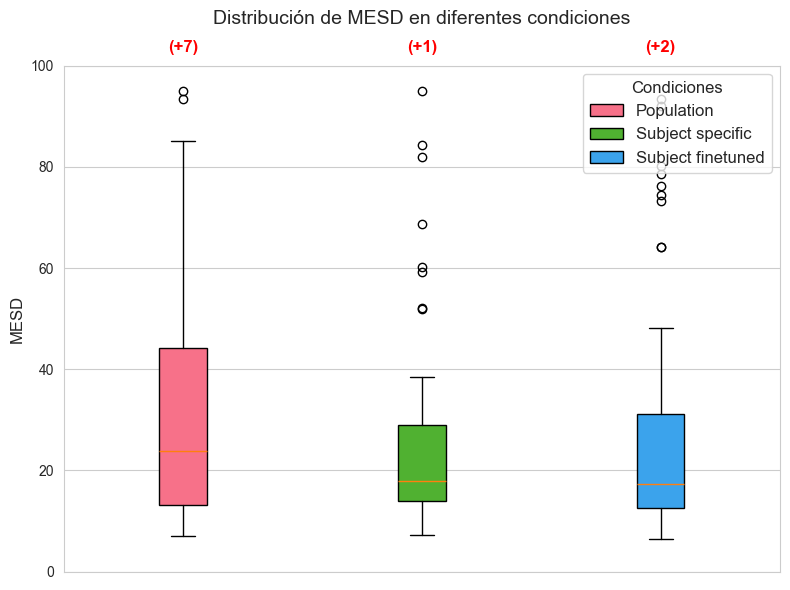

In [159]:
# Representar el diagrama de cajas
# Agrupar las listas en un solo conjunto de datos
data = [mesd_list, ss_mesd_list, sf_mesd_list]
labels = ["Population", "Subject specific", "Subject finetuned"]

# Usar una paleta profesional para asignar colores
palette = sns.color_palette("husl", len(data))
colors = palette

# Establecer estilo profesional
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Crear el diagrama de cajas usando matplotlib (para poder asignar colores individuales)
positions = [1, 2, 3]
boxplot = plt.boxplot(data, positions=positions, widths=0.2, patch_artist=True, showfliers=True)

# Asignar color a cada caja
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

# Eliminar etiquetas del eje x
plt.xticks([])

# Limitar el eje y a 0-100 (MESD)
plt.ylim(0, 100)
plt.ylabel("MESD", fontsize=12)
plt.title("Distribución de MESD en diferentes condiciones", pad=30, fontsize=14)

# Crear leyenda manual para asignar color a cada condición
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cond)
                   for color, cond in zip(colors, labels)]
plt.legend(handles=legend_elements, title="Condiciones", fontsize=12, title_fontsize=12)

# Para cada condición, contar y anotar cuántas muestras superan el límite de 100
for pos, dataset in zip(positions, data):
    count_exceed = np.sum(np.array(dataset) > 100)
    if count_exceed > 0:
        # Coloca el texto cerca del borde superior (por ejemplo, en y=98)
        plt.text(pos, 105, f"(+{count_exceed})",
                 horizontalalignment='center', verticalalignment='top',
                 fontsize=12, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

C:\Users\jaulab\AppData\Local\Temp\ipykernel_19760\670333047.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)


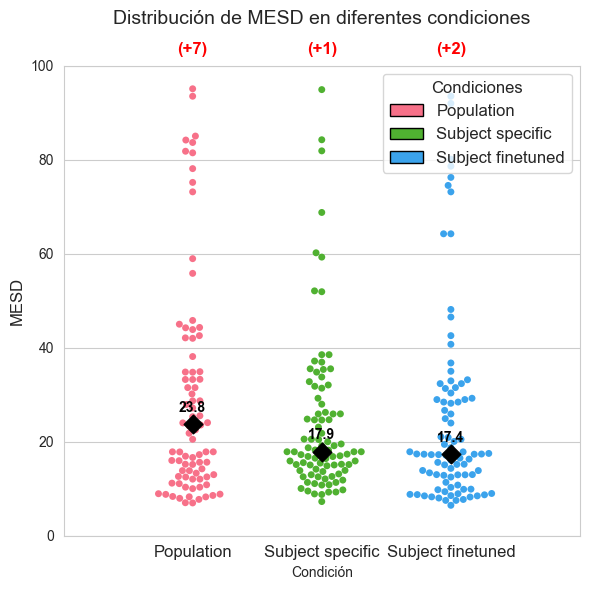

In [165]:
# Crear un DataFrame en formato largo
data = {
    "Condición": np.repeat(labels, repeats=90),
    "MESD": np.concatenate([mesd_list, ss_mesd_list, sf_mesd_list])
}
df = pd.DataFrame(data)

# Configurar estilo profesional y paleta de colores
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)

# Crear la figura
plt.figure(figsize=(6, 6))

# Usar swarmplot para representar los puntos y evitar solapamientos
ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)

# Quitar etiquetas del eje x para que la leyenda por color identifique cada condición
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12)
plt.xlim(-1, len(labels))  # Comprime el espacio en X

# Limitar el eje y a valores entre 0 y 100 (MESD)
plt.ylim(0, 100)
plt.ylabel("MESD", fontsize=12)
plt.title("Distribución de MESD en diferentes condiciones", pad=30, fontsize=14)

# Para cada condición, calcular la mediana y anotar el número de muestras que superan 100
for i, cond in enumerate(labels):
    cond_data = df[df["Condición"] == cond]["MESD"]
    median_val = np.median(cond_data)
    # Agregar marcador de mediana (rombo) en la posición correspondiente
    ax.scatter(i, median_val, color="black", s=90, marker="D", zorder=10)
    # Etiquetar el valor de la mediana
    ax.text(i, median_val + 2, f"{median_val:.1f}", color="black",
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    
    # Contar cuántos valores exceden 100 y anotarlos en la parte superior
    count_exceed = np.sum(cond_data > 100)
    if count_exceed > 0:
        ax.text(i, 105, f"(+{count_exceed})", color="red", ha="center",
                va="top", fontsize=12, fontweight="bold")

# Crear una leyenda manual asociando cada color a su condición
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cond)
                   for color, cond in zip(palette, labels)]
plt.legend(handles=legend_elements, title="Condiciones",
           fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

## Subject specific and subject independent models
De momento suponer modelos subject specific y sin VLAAI ni Conformer

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
from matplotlib.patches import Patch
import pandas as pd

### Subject specific

#### Decoding accuracy

In [285]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CNN' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cnn_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            cnn_accuracies[idx].extend(acc)
cnn_accuracies['10s'][:10], mdl_name

([70.0,
  75.0,
  71.66666666666667,
  71.66666666666667,
  78.33333333333333,
  56.666666666666664,
  85.0,
  80.0,
  75.0,
  60.0],
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle')

In [286]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA' in model and 'comp=16':
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cca_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            cca_accuracies[idx].extend(acc)
cca_accuracies['10s'][:10], mdl_name

([60.0,
  78.33333333333333,
  80.0,
  80.0,
  78.33333333333333,
  60.0,
  88.33333333333333,
  83.33333333333334,
  81.66666666666667,
  75.0],
 'CCA_enc=80_dec=16_comp=16_max_iter=100')

In [287]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ridge_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            ridge_accuracies[idx].extend(acc)
ridge_accuracies['10s'][:10], mdl_name

([68.33333333333333,
  68.33333333333333,
  73.33333333333333,
  68.33333333333333,
  80.0,
  50.0,
  88.33333333333333,
  76.66666666666667,
  63.33333333333333,
  58.333333333333336],
 'Ridge_scikit_start=-26_end=0')

In [288]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_finetuned_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'VLAAI' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
vlaai_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            vlaai_accuracies[idx].extend(acc)
vlaai_accuracies['10s'][:10], mdl_name

([62.03389830508475,
  54.91525423728814,
  67.03389830508475,
  58.389830508474574,
  61.94915254237288,
  54.32203389830509,
  71.10169491525423,
  54.83050847457627,
  57.88135593220339,
  59.57627118644068],
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle')

In [289]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Conformer' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
conformer_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            conformer_accuracies[idx].extend(acc)
conformer_accuracies['10s'][:10], mdl_name

([76.66666666666667,
  66.66666666666666,
  71.66666666666667,
  58.333333333333336,
  66.66666666666666,
  55.00000000000001,
  76.66666666666667,
  80.0,
  60.0,
  60.0],
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle')

In [290]:
# Diccionarios en un conjunto y ajuste keys
cnn_accuracies = {int(key[:-1]): value for key, value in cnn_accuracies.items()}
cca_accuracies = {int(key[:-1]): value for key, value in cca_accuracies.items()}
ridge_accuracies = {int(key[:-1]): value for key, value in ridge_accuracies.items()}
vlaai_accuracies = {int(key[:-1]): value for key, value in vlaai_accuracies.items()}
conformer_accuracies = {int(key[:-1]): value for key, value in conformer_accuracies.items()}

datasets = {
    "Ridge": ridge_accuracies,
    "CCA": cca_accuracies,
    "CNN": cnn_accuracies,
    "Conformer": conformer_accuracies,
    "VLAAI": vlaai_accuracies,
}

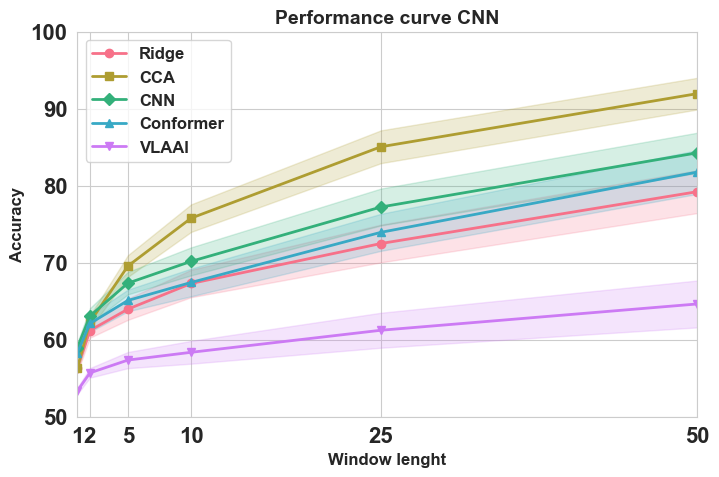

In [291]:
# Estilo de la figura
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(datasets))  # Colores científicos

# Crear la figura
plt.figure(figsize=(8, 5))

# Diccionario de marcadores para diferenciar cada clase
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X']  # Círculo, cuadrado, diamante, triángulo, etc.


# Iterar sobre los datasets y graficarlos
for (label, data), color, marker in zip(datasets.items(), palette, markers):
    x_values = np.array(list(data.keys()))
    means = np.array([np.mean(v) for v in data.values()])
    stds = np.array([np.std(v) for v in data.values()]) *0.2

    # Graficar la media con una línea sólida
    plt.plot(x_values, means, marker=marker, linestyle='-', color=color, linewidth=2, label=label)

    # Agregar el área sombreada de la desviación estándar
    plt.fill_between(x_values, means - stds, means + stds, color=color, alpha=0.2)

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Window lenght", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])
plt.ylim([50, 100])

# Título y leyenda
plt.title("Performance curve CNN", fontsize=14)
plt.legend()

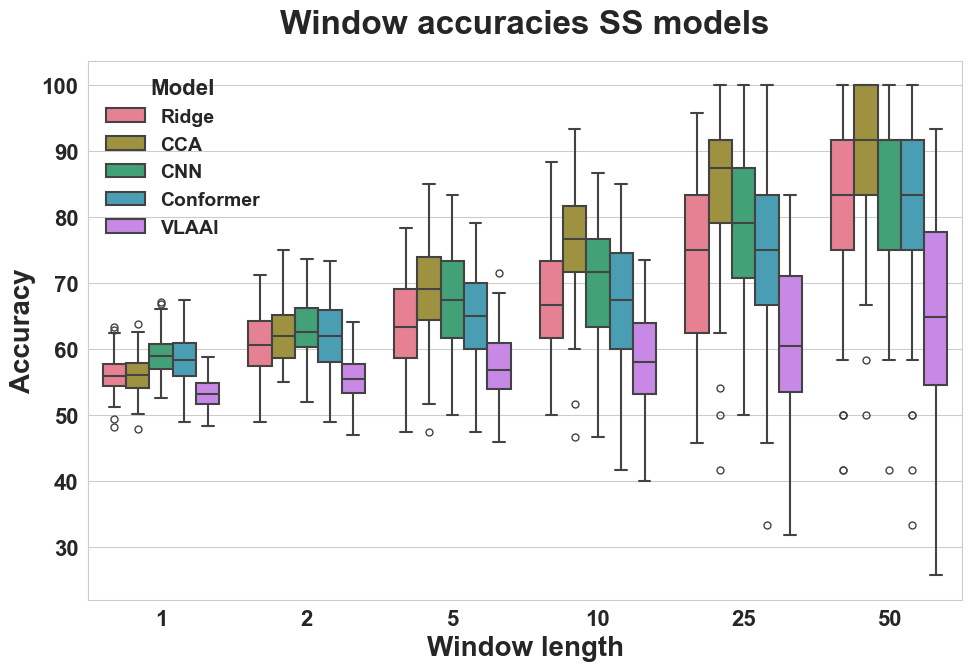

In [292]:
# Reorganizar la información en formato "long"
data_list = []
for model, data in datasets.items():
    for window, accuracies in data.items():
        for acc in accuracies:
            data_list.append({"Window": window, "Accuracy": acc, "Model": model})

df = pd.DataFrame(data_list)

# Convertir la variable de ventana a string para tratarla como categórica (equispaciada en el eje x)
df["Window"] = df["Window"].astype(str)

# Configurar el estilo de Seaborn y parámetros globales de matplotlib para una figura de calidad científica
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 16,
    "font.weight": 'bold',
    "axes.labelweight": 'bold',
    "axes.titlesize": 16,
    "axes.titleweight": 'bold',
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# Crear la figura
plt.figure(figsize=(10, 7))

# Crear el diagrama de cajas con la paleta "husl"
boxplot = sns.boxplot(
    x="Window", y="Accuracy", hue="Model", data=df, palette="husl",
    linewidth=1.5,  # Aumenta el grosor de los bordes de las cajas
    fliersize=5    # Tamaño de los outliers
)

# Ajustar etiquetas y título con estilo en negrita
plt.xlabel("Window length", fontsize=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=20, fontweight='bold')
plt.title("Window accuracies SS models", fontsize=24, fontweight='bold', pad = 20)

# Personalizar la leyenda: eliminar el marco y ajustar la posición
legend = plt.legend(title="Model", loc='upper left', frameon=False)
plt.setp(legend.get_title(), fontweight='bold')

# Ajustar el espaciado y mostrar la figura
plt.tight_layout()
plt.show()

#### MESD

In [293]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CNN' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cnn_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            cnn_mesd_list.extend(mesd)
cnn_mesd_list[:10], mdl_name

([23.130423819012364,
  12.5451029754892,
  11.20751389503039,
  13.42174790708895,
  17.113336314372297,
  174.34606589400522,
  8.002231661029239,
  8.64350686447689,
  25.454052145859265,
  59.26681189991077],
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle')

In [294]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA' in model and 'comp=16' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cca_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            cca_mesd_list.extend(mesd)
cca_mesd_list[:10], mdl_name

([81.87306693075924,
  11.074956227249194,
  15.88827146253139,
  24.801236626374155,
  18.224620422742838,
  94.90549075308292,
  12.072612427264703,
  12.592655899860986,
  27.96838408328573,
  15.532780490591325],
 'CCA_enc=80_dec=16_comp=16_max_iter=100')

In [295]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ridge_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            ridge_mesd_list.extend(mesd)
ridge_mesd_list[:10], mdl_name

([31.37882100014926,
  23.9623185768643,
  19.17854612913822,
  51.8936421862396,
  21.05226055988409,
  248.22965308727132,
  9.985553071451058,
  10.254747785926423,
  37.293683708121684,
  91.16702245568904],
 'Ridge_scikit_start=-26_end=0')

In [296]:
# Cargar el MESD de los modelos subj_specific
key = 'population'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_finetuned_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'VLAAI' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
vlaai_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            vlaai_mesd_list.extend(mesd)
vlaai_mesd_list[:10], mdl_name

([93.39880311297173,
  213.38549654918793,
  55.8690875940978,
  179.17926480911603,
  96.49466446318537,
  870.5740147737274,
  16.89211878603915,
  69.95176120925711,
  202.36388099667516,
  144.45843028997376],
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle')

In [297]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_specific'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Conformer' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
conformer_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            conformer_mesd_list.extend(mesd)
conformer_mesd_list[:10], mdl_name

([19.111633556932397,
  15.61573570157756,
  14.298938508304214,
  28.958897546101547,
  11.209841219560754,
  270.7424698728081,
  7.992194178980581,
  8.7814564365203,
  58.93772681301171,
  95.08155066022229],
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle')

C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\3254385221.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg,

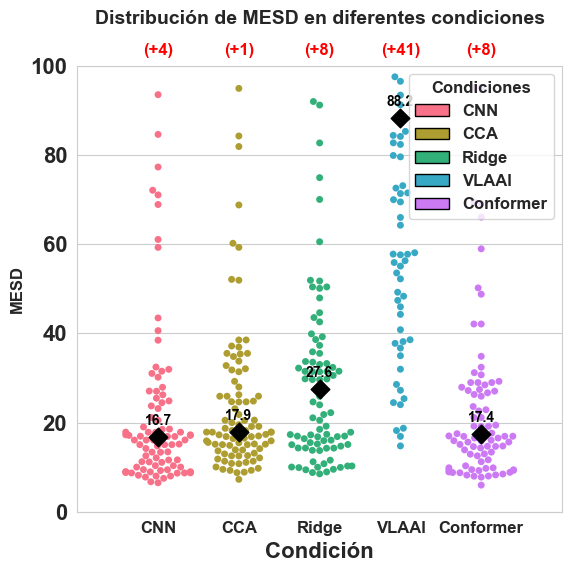

In [298]:
# Etiquetas para cada condición
labels = ["CNN", "CCA", "Ridge", "VLAAI", "Conformer"]
data_lists = [cnn_mesd_list, cca_mesd_list, ridge_mesd_list, vlaai_mesd_list, conformer_mesd_list]

# Construir el DataFrame en formato largo
df = pd.DataFrame({
    "Condición": np.concatenate([np.repeat(label, len(lst)) for label, lst in zip(labels, data_lists)]),
    "MESD": np.concatenate(data_lists)
})

# Configurar estilo profesional y paleta de colores
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(labels))

# Crear la figura
plt.figure(figsize=(6, 6))

# Usar swarmplot para representar los puntos y evitar solapamientos
ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)

# Ajustar etiquetas y límites del eje X e Y
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12)
plt.xlim(-1, len(labels))  # Comprime el espacio en X
plt.ylim(0, 100)
plt.ylabel("MESD", fontsize=12)
plt.title("Distribución de MESD en diferentes condiciones", pad=30, fontsize=14)

# Para cada condición, calcular la mediana y anotar el número de muestras que superan 100
for i, cond in enumerate(labels):
    cond_data = df[df["Condición"] == cond]["MESD"]
    median_val = np.median(cond_data)
    # Agregar marcador de mediana (rombo) en la posición correspondiente
    ax.scatter(i, median_val, color="black", s=90, marker="D", zorder=10)
    # Etiquetar el valor de la mediana
    ax.text(i, median_val + 2, f"{median_val:.1f}", color="black",
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    
    # Contar cuántos valores exceden 100 y anotarlos en la parte superior
    count_exceed = np.sum(cond_data > 100)
    if count_exceed > 0:
        ax.text(i, 105, f"(+{count_exceed})", color="red", ha="center",
                va="top", fontsize=12, fontweight="bold")

# Crear una leyenda manual asociando cada color a su condición
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cond)
                   for color, cond in zip(palette, labels)]
plt.legend(handles=legend_elements, title="Condiciones",
           fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

#### Gráfico conjunto

C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\3041583431.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels(ax_box.get_xticklabels(), fontweight='bold')
C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\3041583431.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Model", y="MESD", data=df_mesd, palette=palette_mesd, ax=ax_swarm)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of

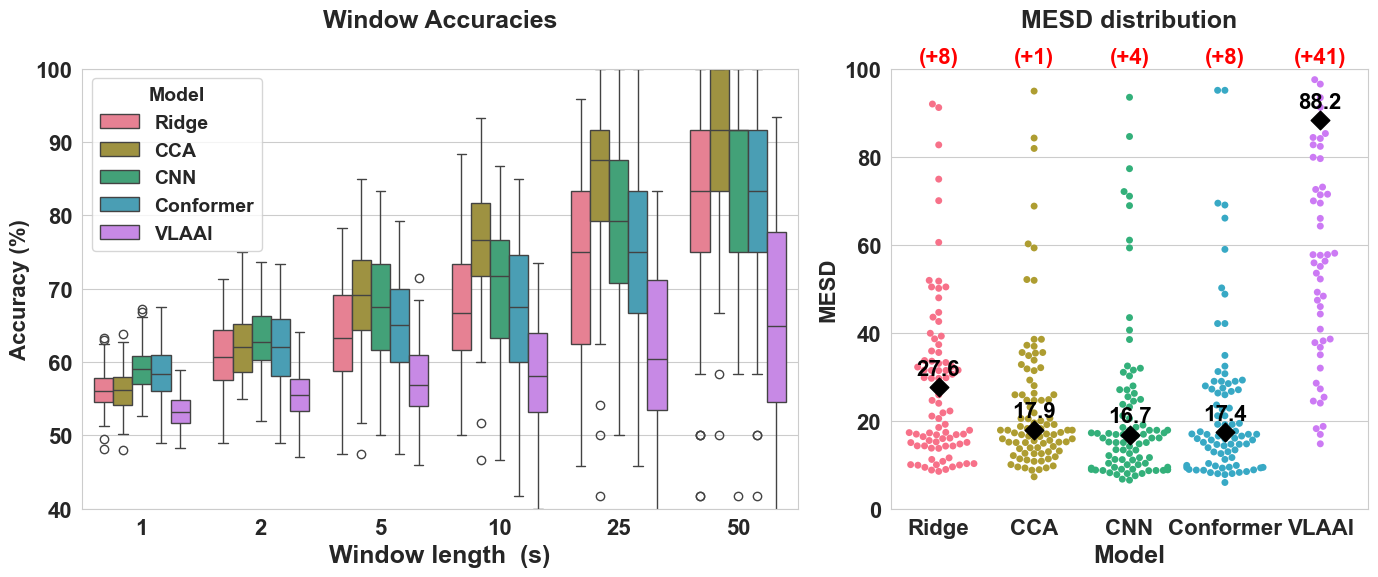

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supuestos:
# - Los diccionarios: ridge_accuracies, cca_accuracies, cnn_accuracies, conformer_accuracies, vlaai_accuracies 
#   contienen la información de accuracies para cada modelo en función del window length.
# - Los arreglos: ridge_mesd_list, cca_mesd_list, cnn_mesd_list, conformer_mesd_list, vlaai_mesd_list 
#   contienen la distribución de MESD para cada modelo.

# Etiquetas para cada modelo (MESD)
labels = ["Ridge", "CCA", "CNN", "Conformer", "VLAAI"]
data_lists = [ridge_mesd_list, cca_mesd_list, cnn_mesd_list, conformer_mesd_list, vlaai_mesd_list]

# Construir el DataFrame para la distribución de MESD
df_mesd = pd.DataFrame({
    "Model": np.concatenate([np.repeat(label, len(lst)) for label, lst in zip(labels, data_lists)]),
    "MESD": np.concatenate(data_lists)
})

data_list = []
for model, data in datasets.items():
    for window, accuracies in data.items():
        for acc in accuracies:
            data_list.append({"Window": window, "Accuracy": acc, "Model": model})
df_perf = pd.DataFrame(data_list)
# Convertir la variable 'Window' a string para que se trate como categórica y sus valores sean equiespaciados
df_perf["Window"] = df_perf["Window"].astype(str)

# Configurar estilo profesional y paletas de colores
sns.set_style("whitegrid")
palette_mesd = sns.color_palette("husl", len(labels))
palette_perf = sns.color_palette("husl", len(datasets))

# Configurar parámetros globales para textos (tamaños y negrita)
plt.rcParams.update({
    "font.size": 14,
    "font.weight": 'bold',
    "axes.labelweight": 'bold',
    "axes.titlesize": 18,
    "axes.titleweight": 'bold',
    "legend.fontsize": 12,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# Crear la figura con 2 subgráficos en horizontal
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[6, 4])

### 📌 Gráfico 1: Diagrama de cajas (Boxplot) de Performance
ax_box = fig.add_subplot(gs[0])
sns.boxplot(x="Window", y="Accuracy", hue="Model", data=df_perf, palette=palette_perf, ax=ax_box)

# Ajustar etiquetas, título y límites
ax_box.set_xlabel("Window length  (s)", fontsize=18, fontweight='bold')
ax_box.set_ylabel("Accuracy (%)", fontsize=16, fontweight='bold')
ax_box.set_title("Window Accuracies", fontsize=18, pad=30, fontweight='bold')
ax_box.set_xticklabels(ax_box.get_xticklabels(), fontweight='bold')
ax_box.legend(title="Model", fontsize=14, title_fontsize=14, loc='upper left')
ax_box.set_ylim([40, 100])
ax_box.set_xlim([-0.5, len(ax_box.get_xticklabels()) - 0.5])

### 📌 Gráfico 2: Swarmplot de MESD
ax_swarm = fig.add_subplot(gs[1])
sns.swarmplot(x="Model", y="MESD", data=df_mesd, palette=palette_mesd, ax=ax_swarm)

# Ajustar etiquetas y límites para el swarmplot
ax_swarm.set_xlabel("Model", fontsize=18, fontweight='bold')
ax_swarm.set_ylabel("MESD", fontsize=16, fontweight='bold')
ax_swarm.set_title("MESD distribution", pad=30, fontsize=18, fontweight='bold')
ax_swarm.set_xticklabels(labels, fontsize=16, fontweight='bold')
ax_swarm.set_xlim(-0.5, len(labels) - 0.5)
ax_swarm.set_ylim(0, 100)

# Agregar medianas y anotaciones en el swarmplot
for i, cond in enumerate(labels):
    cond_data = df_mesd[df_mesd["Model"] == cond]["MESD"]
    median_val = np.median(cond_data)
    ax_swarm.scatter(i, median_val, color="black", s=90, marker="D", zorder=10)
    ax_swarm.text(i, median_val + 2, f"{median_val:.1f}", color="black", ha="center", va="bottom", fontsize=16, fontweight="bold")
    count_exceed = np.sum(cond_data > 100)
    if count_exceed > 0:
        ax_swarm.text(i, 105, f"(+{count_exceed})", color="red", ha="center", va="top", fontsize=16, fontweight="bold")

# Ajustar diseño global y mostrar la figura
plt.tight_layout()
plt.show()

### Subject independent

#### MESD

In [300]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CNN' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1] # For only selecting the first fold only
cnn_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            cnn_mesd_list.extend(mesd)
cnn_mesd_list[:10], mdl_name

([30.694719632366933,
  28.428498424149282,
  22.69818628065017,
  17.374459848431123,
  28.21422656308076,
  87.81411559559143,
  9.011728290918061,
  12.10062876740061,
  79.7041595608905,
  63.58027385589218],
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle')

In [301]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Conformer' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1] # For only selecting the first fold only
conformer_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            conformer_mesd_list.extend(mesd)
conformer_mesd_list[:10], mdl_name

([35.009420502031325,
  27.13134561400886,
  34.956546855602724,
  22.70748822082266,
  32.397651559467825,
  70.52544092523335,
  9.391399560575605,
  27.085575268913992,
  86.70317425993491,
  80.93130388564576],
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle')

In [302]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'VLAAI' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1] # For only selecting the first fold only
vlaai_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            vlaai_mesd_list.extend(mesd)
vlaai_mesd_list[:10], mdl_name

([137.29552713050086,
  244.40628165965612,
  141.25860359365964,
  114.57777280395922,
  155.54867849354693,
  982.3516146748219,
  42.12857217166314,
  173.6749562946418,
  329.6714866740442,
  690.9727982192057],
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle')

In [303]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA':
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cca_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            cca_mesd_list.extend(mesd)
cca_mesd_list[:10], mdl_name

([32.851839060047936,
  46.578561333008054,
  33.74711254194252,
  20.787191538255335,
  18.719239725751798,
  88.51894849189006,
  10.790498613259501,
  14.628794913238858,
  33.74711254194252,
  41.62043395808969],
 'CCA_enc=80_dec=16_comp=4_max_iter=100')

In [304]:
# Cargar el MESD de los modelos subj_specific
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ridge_mesd_list = []
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd == 'mesd':
            # Get the mesd
            wnd_path = os.path.join(fold_path, wnd)
            mesd_metrics = json.load(open(wnd_path, 'rb'))
            mesd = mesd_metrics['mesd']
            # Append the results to the list
            ridge_mesd_list.extend(mesd)
ridge_mesd_list[:10], mdl_name

([58.49436677046052,
  83.97903199442725,
  47.34010760029844,
  25.31101591469759,
  47.63242736326392,
  76.59963871962466,
  12.858952591266434,
  17.289067653364253,
  137.83251656321485,
  126.77904932677072],
 'Ridge_scikit_start=-26_end=0')

C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\3006722089.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)


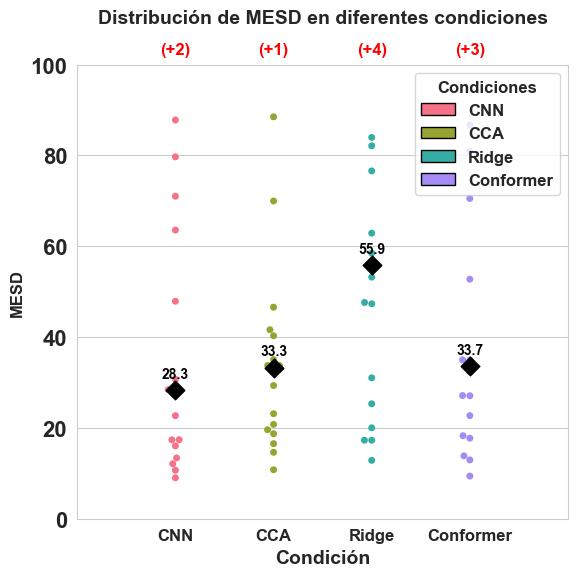

In [305]:
# Etiquetas para cada condición
labels = ["CNN", "CCA", "Ridge", "Conformer"]
data_lists = [cnn_mesd_list, cca_mesd_list, ridge_mesd_list, conformer_mesd_list]

# Construir el DataFrame en formato largo
df = pd.DataFrame({
    "Condición": np.concatenate([np.repeat(label, len(lst)) for label, lst in zip(labels, data_lists)]),
    "MESD": np.concatenate(data_lists)
})

# Configurar estilo profesional y paleta de colores
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(labels))

# Crear la figura
plt.figure(figsize=(6, 6))

# Usar swarmplot para representar los puntos y evitar solapamientos
ax = sns.swarmplot(x="Condición", y="MESD", data=df, palette=palette)

# Ajustar etiquetas y límites del eje X e Y
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12)
plt.xlim(-1, len(labels))  # Comprime el espacio en X
plt.ylim(0, 100)
plt.ylabel("MESD", fontsize=12)
plt.title("Distribución de MESD en diferentes condiciones", pad=30, fontsize=14)

# Para cada condición, calcular la mediana y anotar el número de muestras que superan 100
for i, cond in enumerate(labels):
    cond_data = df[df["Condición"] == cond]["MESD"]
    median_val = np.median(cond_data)
    # Agregar marcador de mediana (rombo) en la posición correspondiente
    ax.scatter(i, median_val, color="black", s=90, marker="D", zorder=10)
    # Etiquetar el valor de la mediana
    ax.text(i, median_val + 2, f"{median_val:.1f}", color="black",
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    
    # Contar cuántos valores exceden 100 y anotarlos en la parte superior
    count_exceed = np.sum(cond_data > 100)
    if count_exceed > 0:
        ax.text(i, 105, f"(+{count_exceed})", color="red", ha="center",
                va="top", fontsize=12, fontweight="bold")

# Crear una leyenda manual asociando cada color a su condición
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cond)
                   for color, cond in zip(palette, labels)]
plt.legend(handles=legend_elements, title="Condiciones",
           fontsize=12, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

#### Análisis estadístico

In [306]:
# Comprobación normalidad
from scipy.stats import shapiro, normaltest

In [307]:
for mesd_list in data_lists:
    stat1, p1 = shapiro(mesd_list)
    print(f'Shapiro loss ss: p = {p1}')

Shapiro loss ss: p = 2.1028300523084908e-07
Shapiro loss ss: p = 1.549206629647415e-08
Shapiro loss ss: p = 4.0075075702361573e-08
Shapiro loss ss: p = 1.2769633883635834e-07


No se puede asumir normalidad en la distribución de los datos de los distintos sujetos por lo que no podemos utilizar un análisis estadístico paramétrico como urilizabamos anteriormente para el resultado de la precisión. En otros artículos utilizaba el Wilson ranked test para análizar datos no parámetricos.

#### Decoding accuracy

In [308]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CNN' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1]
cnn_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            cnn_accuracies[idx].extend(acc)
cnn_accuracies['10s'][:10], mdl_name

([69.0,
  65.33333333333333,
  73.0,
  73.33333333333333,
  70.0,
  59.66666666666667,
  84.0,
  72.66666666666667,
  56.00000000000001,
  62.33333333333333],
 'CNN_batch=128_block=50_lr=2e-05_dr=0.2_shuffle')

In [309]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Conformer' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1]
conformer_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            conformer_accuracies[idx].extend(acc)
conformer_accuracies['10s'][:10], mdl_name

([64.66666666666666,
  64.33333333333333,
  66.66666666666666,
  71.0,
  64.66666666666666,
  60.333333333333336,
  76.0,
  66.33333333333333,
  57.333333333333336,
  60.333333333333336],
 'Conformer_batch=128_block=50_lr=2e-06_dr=0.4_shuffle')

In [310]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'VLAAI' in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
folds = folds[:1]
vlaai_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            vlaai_accuracies[idx].extend(acc)
vlaai_accuracies['10s'][:10], mdl_name

([58.06020066889632,
  56.82274247491639,
  59.314381270903006,
  59.96655518394649,
  56.404682274247484,
  53.01003344481605,
  62.909698996655514,
  55.10033444816054,
  55.01672240802675,
  52.642140468227424],
 'VLAAI_batch=64_block=320_lr=1e-05_dr=0.4_shuffle')

In [311]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'CCA' in model and 'comp=16':
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
cca_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            cca_accuracies[idx].extend(acc)
cca_accuracies['10s'][:10], mdl_name

([71.0,
  68.0,
  68.0,
  75.66666666666667,
  78.0,
  62.33333333333333,
  86.33333333333333,
  82.66666666666667,
  68.33333333333333,
  67.0],
 'CCA_enc=80_dec=16_comp=4_max_iter=100')

In [312]:
# Cargar datos para modelos subj-specific de los distintos modelos
key = 'subj_independent'
model_paths = os.path.join(global_path, 'results', 'euroacustics', key, 'decode_accuracy', 'fulsang_data')
mdl_name = None
for model in os.listdir(model_paths):
    if 'Ridge_scikit' in model and 'trial' not in model:
        mdl_name = model
        break
model_path = os.path.join(model_paths, mdl_name)
folds = os.listdir(model_path)
ridge_accuracies = {'1s':[],'2s':[],'5s':[],'10s':[],'25s':[],'50s':[]}
for cv_fold in folds:
    fold_path = os.path.join(model_path, cv_fold)
    windows = os.listdir(fold_path)
    for wnd in windows:
        if wnd != 'mesd':
            # Get the 
            wnd_path = os.path.join(fold_path, wnd)
            acc = json.load(open(wnd_path, 'rb'))
            # Extract the window idx 1s,10s...
            idx = wnd.split('_')[0]
            # Append the results to the corresponding idx
            ridge_accuracies[idx].extend(acc)
ridge_accuracies['10s'][:10], mdl_name

([64.66666666666666,
  62.0,
  70.0,
  71.0,
  66.0,
  61.66666666666667,
  77.33333333333333,
  70.66666666666667,
  59.0,
  58.666666666666664],
 'Ridge_scikit_start=-26_end=0')

In [313]:
# Diccionarios en un conjunto y ajuste keys
cnn_accuracies = {int(key[:-1]): value for key, value in cnn_accuracies.items()}
cca_accuracies = {int(key[:-1]): value for key, value in cca_accuracies.items()}
ridge_accuracies = {int(key[:-1]): value for key, value in ridge_accuracies.items()}
vlaai_accuracies = {int(key[:-1]): value for key, value in vlaai_accuracies.items()}
conformer_accuracies = {int(key[:-1]): value for key, value in conformer_accuracies.items()}

datasets = {
    "Ridge": ridge_accuracies,
    "CCA": cca_accuracies,
    "CNN": cnn_accuracies,
    "Conformer": conformer_accuracies,
    # "VLAAI": vlaai_accuracies,
}

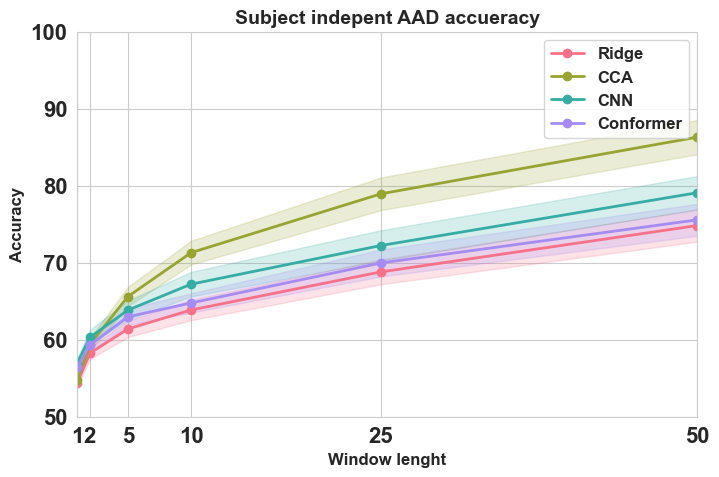

In [314]:
# Estilo de la figura
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(datasets))  # Colores científicos

# Crear la figura
plt.figure(figsize=(8, 5))

# Iterar sobre los datasets y graficarlos
for (label, data), color in zip(datasets.items(), palette):
    x_values = np.array(list(data.keys()))
    means = np.array([np.mean(v) for v in data.values()])
    stds = np.array([np.std(v) for v in data.values()]) *0.2

    # Graficar la media con una línea sólida
    plt.plot(x_values, means, marker='o', linestyle='-', color=color, linewidth=2, label=label)

    # Agregar el área sombreada de la desviación estándar
    plt.fill_between(x_values, means - stds, means + stds, color=color, alpha=0.2)

# Ajustes de ejes
plt.xticks(x_values, x_values)  # Asegurar que se muestren todos los valores en x
plt.xlabel("Window lenght", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xlim([1, 50])
plt.ylim([50, 100])

# Título y leyenda
plt.title("Subject indepent AAD accueracy", fontsize=14)
plt.legend()

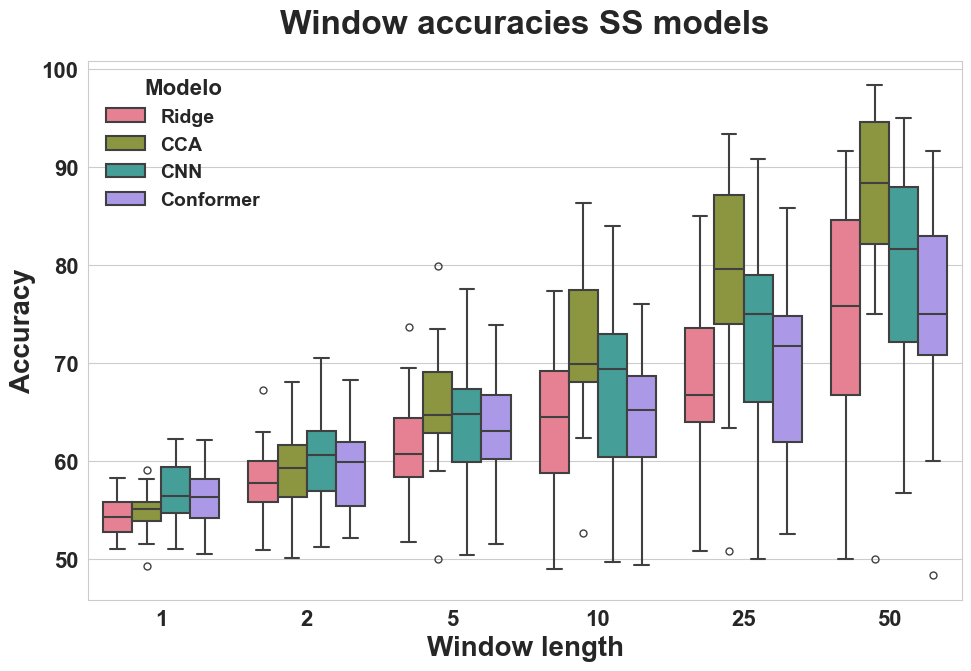

In [315]:
# Reorganizar la información en formato "long"
data_list = []
for model, data in datasets.items():
    for window, accuracies in data.items():
        for acc in accuracies:
            data_list.append({"Window": window, "Accuracy": acc, "Model": model})

df = pd.DataFrame(data_list)

# Convertir la variable de ventana a string para tratarla como categórica (equispaciada en el eje x)
df["Window"] = df["Window"].astype(str)

# Configurar el estilo de Seaborn y parámetros globales de matplotlib para una figura de calidad científica
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 16,
    "font.weight": 'bold',
    "axes.labelweight": 'bold',
    "axes.titlesize": 16,
    "axes.titleweight": 'bold',
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# Crear la figura
plt.figure(figsize=(10, 7))

# Crear el diagrama de cajas con la paleta "husl"
boxplot = sns.boxplot(
    x="Window", y="Accuracy", hue="Model", data=df, palette="husl",
    linewidth=1.5,  # Aumenta el grosor de los bordes de las cajas
    fliersize=5    # Tamaño de los outliers
)

# Ajustar etiquetas y título con estilo en negrita
plt.xlabel("Window length", fontsize=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=20, fontweight='bold')
plt.title("Window accuracies SS models", fontsize=24, fontweight='bold', pad = 20)

# Personalizar la leyenda: eliminar el marco y ajustar la posición
legend = plt.legend(title="Modelo", loc='upper left', frameon=False)
plt.setp(legend.get_title(), fontweight='bold')

# Ajustar el espaciado y mostrar la figura
plt.tight_layout()
plt.show()

#### Gráfico conjunto

C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\2617611814.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels(ax_box.get_xticklabels(), fontweight='bold')
C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\2617611814.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Model", y="MESD", data=df_mesd, palette=palette_mesd, ax=ax_swarm)
c:\Users\jaulab\SSS_Enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jaulab\AppData\Local\Temp\ipykernel_16928\2617611814.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

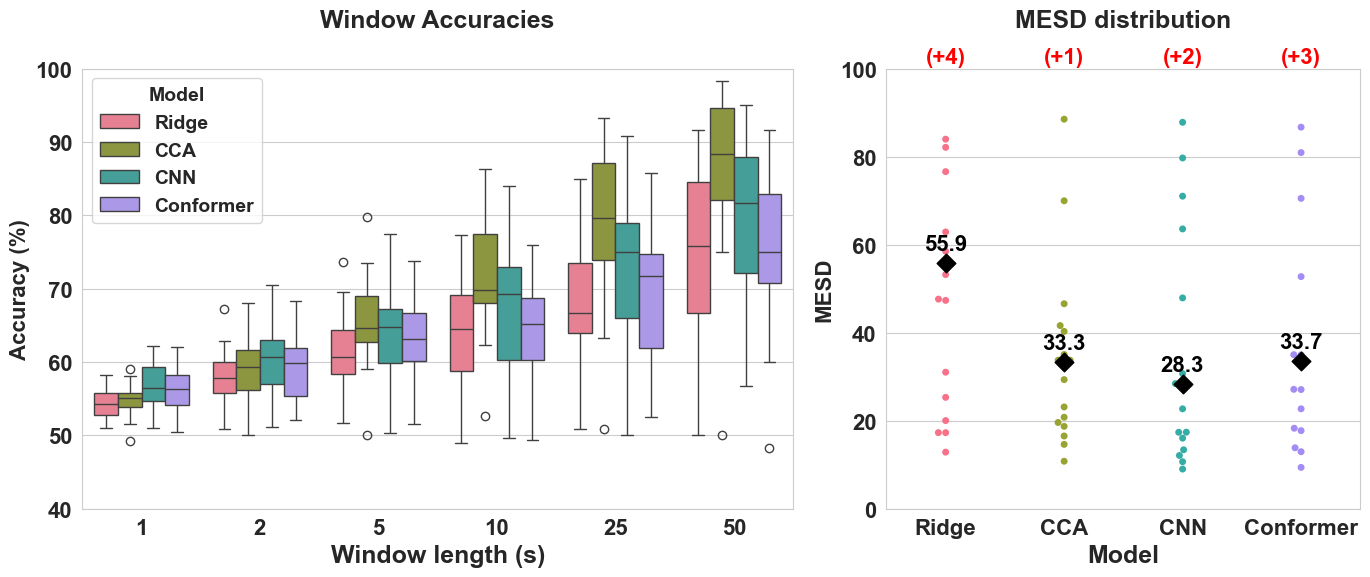

In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Supuestos:
# - Los diccionarios: ridge_accuracies, cca_accuracies, cnn_accuracies, conformer_accuracies, vlaai_accuracies 
#   contienen la información de accuracies para cada modelo en función del window length.
# - Los arreglos: ridge_mesd_list, cca_mesd_list, cnn_mesd_list, conformer_mesd_list, vlaai_mesd_list 
#   contienen la distribución de MESD para cada modelo.

# Etiquetas para cada modelo (MESD)
labels = ["Ridge", "CCA", "CNN", "Conformer"]
data_lists = [ridge_mesd_list, cca_mesd_list, cnn_mesd_list, conformer_mesd_list]

# Construir el DataFrame para la distribución de MESD
df_mesd = pd.DataFrame({
    "Model": np.concatenate([np.repeat(label, len(lst)) for label, lst in zip(labels, data_lists)]),
    "MESD": np.concatenate(data_lists)
})

data_list = []
for model, data in datasets.items():
    for window, accuracies in data.items():
        for acc in accuracies:
            data_list.append({"Window": window, "Accuracy": acc, "Model": model})
df_perf = pd.DataFrame(data_list)
# Convertir la variable 'Window' a string para que se trate como categórica y sus valores sean equiespaciados
df_perf["Window"] = df_perf["Window"].astype(str)

# Configurar estilo profesional y paletas de colores
sns.set_style("whitegrid")
palette_mesd = sns.color_palette("husl", len(labels))
palette_perf = sns.color_palette("husl", len(datasets))

# Configurar parámetros globales para textos (tamaños y negrita)
plt.rcParams.update({
    "font.size": 14,
    "font.weight": 'bold',
    "axes.labelweight": 'bold',
    "axes.titlesize": 16,
    "axes.titleweight": 'bold',
    "legend.fontsize": 12,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

# Crear la figura con 2 subgráficos en horizontal
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[6, 4])

### 📌 Gráfico 1: Diagrama de cajas (Boxplot) de Performance
ax_box = fig.add_subplot(gs[0])
sns.boxplot(x="Window", y="Accuracy", hue="Model", data=df_perf, palette=palette_perf, ax=ax_box)

# Ajustar etiquetas, título y límites
ax_box.set_xlabel("Window length (s)", fontsize=18, fontweight='bold')
ax_box.set_ylabel("Accuracy (%)", fontsize=16, fontweight='bold')
ax_box.set_title("Window Accuracies", fontsize=18, pad=30, fontweight='bold')
ax_box.set_xticklabels(ax_box.get_xticklabels(), fontweight='bold')
ax_box.legend(title="Model", fontsize=14, title_fontsize=14, loc='upper left')
ax_box.set_ylim([40, 100])
ax_box.set_xlim([-0.5, len(ax_box.get_xticklabels()) - 0.5])

### 📌 Gráfico 2: Swarmplot de MESD
ax_swarm = fig.add_subplot(gs[1])
sns.swarmplot(x="Model", y="MESD", data=df_mesd, palette=palette_mesd, ax=ax_swarm)

# Ajustar etiquetas y límites para el swarmplot
ax_swarm.set_xlabel("Model", fontsize=18, fontweight='bold')
ax_swarm.set_ylabel("MESD", fontsize=16, fontweight='bold')
ax_swarm.set_title("MESD distribution", pad=30, fontsize=18, fontweight='bold')
ax_swarm.set_xticklabels(labels, fontsize=16, fontweight='bold')
ax_swarm.set_xlim(-0.5, len(labels) - 0.5)
ax_swarm.set_ylim(0, 100)

# Agregar medianas y anotaciones en el swarmplot
for i, cond in enumerate(labels):
    cond_data = df_mesd[df_mesd["Model"] == cond]["MESD"]
    median_val = np.median(cond_data)
    ax_swarm.scatter(i, median_val, color="black", s=90, marker="D", zorder=10)
    ax_swarm.text(i, median_val + 2, f"{median_val:.1f}", color="black", ha="center", va="bottom", fontsize=16, fontweight="bold")
    count_exceed = np.sum(cond_data > 100)
    if count_exceed > 0:
        ax_swarm.text(i, 105, f"(+{count_exceed})", color="red", ha="center", va="top", fontsize=16, fontweight="bold")

# Ajustar diseño global y mostrar la figura
plt.tight_layout()
plt.show()